In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


# Theater Audience Prediction - Complete ML Pipeline

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


# 2. Load All Data Files

In [3]:
# Load all datasets
booknow_booking = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv')
booknow_theaters = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')
booknow_visits = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv')
cinePOS_booking = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')
cinePOS_theaters = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')
date_info = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv')
movie_theater_id_relation = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv')
sample_submission = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')

print("All data files loaded successfully!")
print(f"\nDataset shapes:")
print(f"BookNow Booking: {booknow_booking.shape}")
print(f"BookNow Theaters: {booknow_theaters.shape}")
print(f"BookNow Visits: {booknow_visits.shape}")
print(f"CinePOS Booking: {cinePOS_booking.shape}")
print(f"CinePOS Theaters: {cinePOS_theaters.shape}")
print(f"Date Info: {date_info.shape}")
print(f"Theater ID Relation: {movie_theater_id_relation.shape}")
print(f"Sample Submission: {sample_submission.shape}")


All data files loaded successfully!

Dataset shapes:
BookNow Booking: (68336, 4)
BookNow Theaters: (829, 5)
BookNow Visits: (214046, 3)
CinePOS Booking: (1641966, 4)
CinePOS Theaters: (4690, 5)
Date Info: (547, 2)
Theater ID Relation: (150, 2)
Sample Submission: (38062, 2)


# 3. Exploratory Data Analysis (EDA)

**3.1 Examine BookNow Booking**

In [4]:
print("="*80)
print("BOOKNOW BOOKING DATA")
print("="*80)
print(booknow_booking.head())
print(f"\nShape: {booknow_booking.shape}")
print(f"\nData types:\n{booknow_booking.dtypes}")
print(f"\nMissing values:\n{booknow_booking.isnull().sum()}")
print(f"\nBasic statistics:\n{booknow_booking.describe()}")


BOOKNOW BOOKING DATA
  book_theater_id        show_datetime     booking_datetime  tickets_booked
0      book_00244  2023-01-01 19:00:00  2023-01-01 16:00:00               1
1      book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00               3
2      book_00740  2023-01-01 19:00:00  2023-01-01 19:00:00               6
3      book_00244  2023-01-01 20:00:00  2023-01-01 16:00:00               2
4      book_00151  2023-01-01 20:00:00  2023-01-01 01:00:00               5

Shape: (68336, 4)

Data types:
book_theater_id     object
show_datetime       object
booking_datetime    object
tickets_booked       int64
dtype: object

Missing values:
book_theater_id     0
show_datetime       0
booking_datetime    0
tickets_booked      0
dtype: int64

Basic statistics:
       tickets_booked
count    68336.000000
mean         4.425808
std          4.808945
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        100.000000


3.2 BookNow Theaters

In [5]:
print("\n" + "="*80)
print("BOOKNOW THEATERS DATA")
print("="*80)
print(booknow_theaters.head())
print(f"\nShape: {booknow_theaters.shape}")
print(f"\nUnique theaters: {booknow_theaters['book_theater_id'].nunique()}")
print(f"\nTheater types:\n{booknow_theaters['theater_type'].value_counts()}")
print(f"\nTheater areas: {booknow_theaters['theater_area'].nunique()}")



BOOKNOW THEATERS DATA
  book_theater_id theater_type theater_area   latitude  longitude
0      book_00093        Drama     Area_001  22.619233  78.113017
1      book_00078        Drama     Area_001  22.619233  78.113017
2      book_00291        Drama     Area_001  22.619233  78.113017
3      book_00258        Drama     Area_001  22.619233  78.113017
4      book_00212        Drama     Area_002  23.004410  79.934515

Shape: (829, 5)

Unique theaters: 314

Theater types:
theater_type
Other     411
Comedy    196
Drama     183
Action     39
Name: count, dtype: int64

Theater areas: 103


3.3 BookNow Visits (Target)

In [6]:
print("\n" + "="*80)
print("BOOKNOW VISITS DATA (TRAINING TARGET)")
print("="*80)
print(booknow_visits.head(10))
print(f"\nShape: {booknow_visits.shape}")
print(f"\nAudience count statistics:\n{booknow_visits['audience_count'].describe()}")



BOOKNOW VISITS DATA (TRAINING TARGET)
  book_theater_id   show_date  audience_count
0      book_00001  2023-01-13              50
1      book_00001  2023-01-14              64
2      book_00001  2023-01-15              58
3      book_00001  2023-01-16              44
4      book_00001  2023-01-18              12
5      book_00001  2023-01-19              18
6      book_00001  2023-01-20              62
7      book_00001  2023-01-21              42
8      book_00001  2023-01-22              36
9      book_00001  2023-01-23              52

Shape: (214046, 3)

Audience count statistics:
count    214046.000000
mean         41.616568
std          32.834918
min           2.000000
25%          18.000000
50%          34.000000
75%          58.000000
max        1350.000000
Name: audience_count, dtype: float64


3.3.1 Audience Distribution Visualization

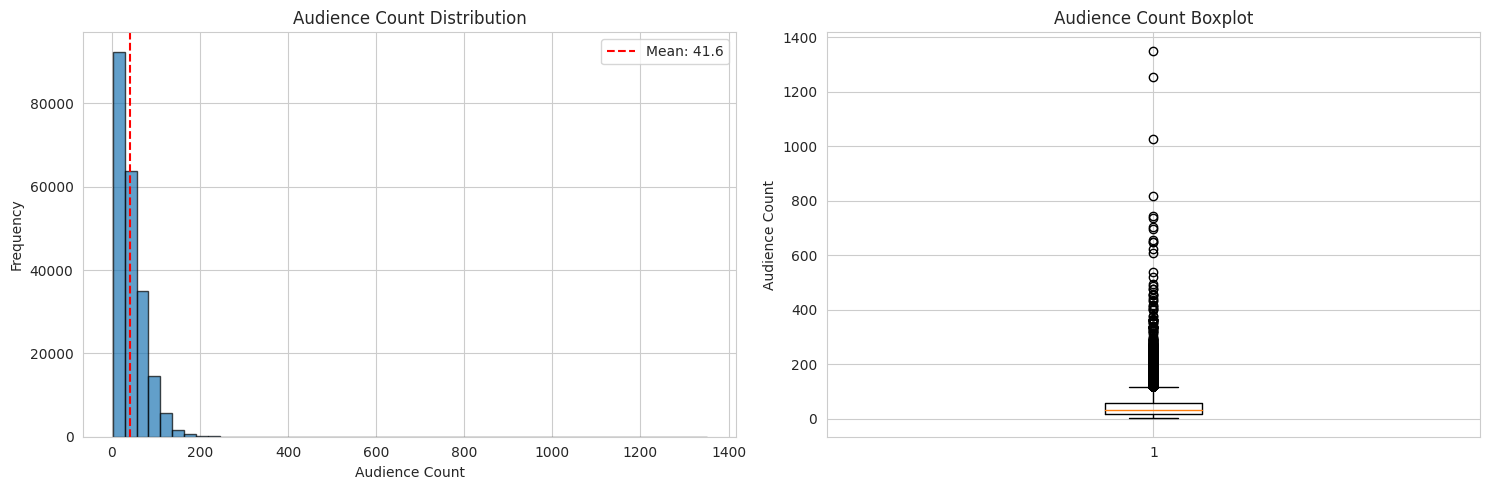

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(booknow_visits['audience_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Audience Count Distribution')
axes[0].set_xlabel('Audience Count')
axes[0].set_ylabel('Frequency')
axes[0].axvline(booknow_visits['audience_count'].mean(), color='red', linestyle='--',
                label=f"Mean: {booknow_visits['audience_count'].mean():.1f}")
axes[0].legend()

axes[1].boxplot(booknow_visits['audience_count'])
axes[1].set_title('Audience Count Boxplot')
axes[1].set_ylabel('Audience Count')

plt.tight_layout()
plt.show()


3.4 CinePOS Booking

In [8]:
print("\n" + "="*80)
print("CINEPOS BOOKING DATA")
print("="*80)
print(cinePOS_booking.head())
print(f"\nShape: {cinePOS_booking.shape}")
print(f"\nTickets sold statistics:\n{cinePOS_booking['tickets_sold'].describe()}")



CINEPOS BOOKING DATA
  cine_theater_id        show_datetime     booking_datetime  tickets_sold
0   cinePOS_00001  2023-01-01 11:00:00  2023-01-01 09:00:00             1
1   cinePOS_00002  2023-01-01 13:00:00  2023-01-01 06:00:00             3
2   cinePOS_00003  2023-01-01 16:00:00  2023-01-01 14:00:00             2
3   cinePOS_00004  2023-01-01 17:00:00  2023-01-01 11:00:00             5
4   cinePOS_00005  2023-01-01 17:00:00  2023-01-01 03:00:00            13

Shape: (1641966, 4)

Tickets sold statistics:
count    1.641966e+06
mean     4.987345e+00
std      5.234901e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.000000e+02
Name: tickets_sold, dtype: float64


3.5 CinePOS Theaters

In [9]:
print("\n" + "="*80)
print("CINEPOS THEATERS DATA")
print("="*80)
print(cinePOS_theaters.head())
print(f"\nShape: {cinePOS_theaters.shape}")
print(f"\nUnique theaters: {cinePOS_theaters['cine_theater_id'].nunique()}")
print(f"\nTheater types:\n{cinePOS_theaters['theater_type'].value_counts()}")



CINEPOS THEATERS DATA
  cine_theater_id theater_type theater_area   latitude  longitude
0   cinePOS_05466        Other     Area_104  22.619233  78.113017
1   cinePOS_08708        Other     Area_104  22.619233  78.113017
2   cinePOS_00753        Other     Area_104  22.619233  78.113017
3   cinePOS_05776        Other     Area_104  22.619233  78.113017
4   cinePOS_07536        Other     Area_104  23.004410  79.934515

Shape: (4690, 5)

Unique theaters: 4690

Theater types:
theater_type
Other     3941
Drama      705
Action      44
Name: count, dtype: int64


3.6 Date Info

In [10]:
print("\n" + "="*80)
print("DATE INFO DATA")
print("="*80)
print(date_info.head(10))
print(f"\nShape: {date_info.shape}")
print(f"\nDay of week distribution:\n{date_info['day_of_week'].value_counts()}")



DATE INFO DATA
    show_date day_of_week
0  2023-01-01      Sunday
1  2023-01-02      Monday
2  2023-01-03     Tuesday
3  2023-01-04   Wednesday
4  2023-01-05    Thursday
5  2023-01-06      Friday
6  2023-01-07    Saturday
7  2023-01-08      Sunday
8  2023-01-09      Monday
9  2023-01-10     Tuesday

Shape: (547, 2)

Day of week distribution:
day_of_week
Sunday       79
Monday       78
Tuesday      78
Wednesday    78
Thursday     78
Friday       78
Saturday     78
Name: count, dtype: int64


3.7 Theater ID Relations

In [11]:
print("\n" + "="*80)
print("THEATER ID RELATION DATA")
print("="*80)
print(movie_theater_id_relation.head())
print(f"\nShape: {movie_theater_id_relation.shape}")
print(f"\nUnique BookNow theaters: {movie_theater_id_relation['book_theater_id'].nunique()}")
print(f"\nUnique CinePOS theaters: {movie_theater_id_relation['cine_theater_id'].nunique()}")



THEATER ID RELATION DATA
  book_theater_id cine_theater_id
0      book_00509   cinePOS_01261
1      book_00063   cinePOS_02467
2      book_00054   cinePOS_08923
3      book_00094   cinePOS_02479
4      book_00052   cinePOS_06750

Shape: (150, 2)

Unique BookNow theaters: 150

Unique CinePOS theaters: 150


3.8 Sample Submission

In [12]:
print("\n" + "="*80)
print("SAMPLE SUBMISSION (TEST DATA)")
print("="*80)
print(sample_submission.head(10))
print(f"\nShape: {sample_submission.shape}")
print(f"\nTarget audience_count in submission: {sample_submission['audience_count'].unique()}")



SAMPLE SUBMISSION (TEST DATA)
                      ID  audience_count
0  book_00001_2024-03-01               0
1  book_00001_2024-03-02               0
2  book_00001_2024-03-03               0
3  book_00001_2024-03-04               0
4  book_00001_2024-03-06               0
5  book_00001_2024-03-07               0
6  book_00001_2024-03-08               0
7  book_00001_2024-03-09               0
8  book_00001_2024-03-10               0
9  book_00001_2024-03-11               0

Shape: (38062, 2)

Target audience_count in submission: [0]


3.9 Parse Datetime Columns

In [13]:
print("Parsing datetime columns...")

# BookNow Booking
booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])

# BookNow Visits
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])

# CinePOS Booking
cinePOS_booking['show_datetime'] = pd.to_datetime(cinePOS_booking['show_datetime'])
cinePOS_booking['booking_datetime'] = pd.to_datetime(cinePOS_booking['booking_datetime'])

# Date Info
date_info['show_date'] = pd.to_datetime(date_info['show_date'])

print("Datetime parsing complete!")

print(f"\nBookNow Visits date range: {booknow_visits['show_date'].min()} to {booknow_visits['show_date'].max()}")
print(f"BookNow Booking date range: {booknow_booking['show_datetime'].min()} to {booknow_booking['show_datetime'].max()}")
print(f"CinePOS Booking date range: {cinePOS_booking['show_datetime'].min()} to {cinePOS_booking['show_datetime'].max()}")


Parsing datetime columns...
Datetime parsing complete!

BookNow Visits date range: 2023-01-01 00:00:00 to 2024-02-28 00:00:00
BookNow Booking date range: 2023-01-01 19:00:00 to 2024-02-28 23:00:00
CinePOS Booking date range: 2023-01-01 11:00:00 to 2024-02-28 23:00:00


3.10 Test Data Structure

In [14]:
# Split ID
parts = sample_submission['ID'].str.split('_')

sample_submission['prefix'] = parts.str[0]              # book
sample_submission['book_theater_id'] = parts.str[1]     # 00001
sample_submission['show_date'] = pd.to_datetime(parts.str[2])  # real date

# Correct day_of_week
sample_submission['day_of_week'] = sample_submission['show_date'].dt.day_name()

print("Test data structure:")
print(f"Unique theaters in test: {sample_submission['book_theater_id'].nunique()}")
print(f"Test date range: {sample_submission['show_date'].min()} to {sample_submission['show_date'].max()}")

print("\nSample rows:")
print(sample_submission[['ID','book_theater_id','show_date','day_of_week','prefix']].head())


Test data structure:
Unique theaters in test: 827
Test date range: 2024-03-01 00:00:00 to 2024-04-22 00:00:00

Sample rows:
                      ID book_theater_id  show_date day_of_week prefix
0  book_00001_2024-03-01           00001 2024-03-01      Friday   book
1  book_00001_2024-03-02           00001 2024-03-02    Saturday   book
2  book_00001_2024-03-03           00001 2024-03-03      Sunday   book
3  book_00001_2024-03-04           00001 2024-03-04      Monday   book
4  book_00001_2024-03-06           00001 2024-03-06   Wednesday   book


# 4. Feature Engineering

4.1 Merge Training Base Data

In [15]:
print("Creating training dataset with features...")

train_data = booknow_visits.copy()

train_data = train_data.merge(date_info, on='show_date', how='left')
train_data = train_data.merge(booknow_theaters, on='book_theater_id', how='left')

train_data = train_data.merge(movie_theater_id_relation, on='book_theater_id', how='left')
train_data = train_data.merge(
    cinePOS_theaters, 
    on='cine_theater_id', 
    how='left', 
    suffixes=('_book', '_cine')
)

print(f"Training data shape after merges: {train_data.shape}")
print(f"Training data columns: {train_data.columns.tolist()}")


Creating training dataset with features...
Training data shape after merges: (214046, 13)
Training data columns: ['book_theater_id', 'show_date', 'audience_count', 'day_of_week', 'theater_type_book', 'theater_area_book', 'latitude_book', 'longitude_book', 'cine_theater_id', 'theater_type_cine', 'theater_area_cine', 'latitude_cine', 'longitude_cine']


4.2 Temporal Features

In [16]:
train_data['year'] = train_data['show_date'].dt.year
train_data['month'] = train_data['show_date'].dt.month
train_data['day'] = train_data['show_date'].dt.day
train_data['day_of_year'] = train_data['show_date'].dt.dayofyear
train_data['week_of_year'] = train_data['show_date'].dt.isocalendar().week
train_data['quarter'] = train_data['show_date'].dt.quarter

train_data['is_weekend'] = train_data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_data['is_month_start'] = train_data['show_date'].dt.is_month_start.astype(int)
train_data['is_month_end'] = train_data['show_date'].dt.is_month_end.astype(int)

print("Temporal features created!")


Temporal features created!


4.3 Booking Aggregations – BookNow

In [17]:
print("Creating booking features from BookNow booking data...")

booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_datetime'].dt.date)
booknow_booking['hour'] = booknow_booking['show_datetime'].dt.hour
booknow_booking['booking_lead_time'] = (
    booknow_booking['show_datetime'] - booknow_booking['booking_datetime']
).dt.total_seconds() / 3600

booking_agg = booknow_booking.groupby(['book_theater_id', 'show_date']).agg({
    'tickets_booked': ['sum','mean','count','std','min','max'],
    'booking_lead_time': ['mean','median','std'],
    'hour': ['mean','min','max']
}).reset_index()

booking_agg.columns = ['_'.join(col).strip('_') if col[1] else col[0] 
                       for col in booking_agg.columns.values]

train_data = train_data.merge(
    booking_agg, on=['book_theater_id','show_date'], how='left'
)

print(train_data.shape)


Creating booking features from BookNow booking data...
(214046, 34)


4.4 Booking Aggregations – CinePOS

In [18]:
print("Creating booking features from CinePOS booking data...")

cinePOS_booking['show_date'] = pd.to_datetime(cinePOS_booking['show_datetime'].dt.date)
cinePOS_booking['hour'] = cinePOS_booking['show_datetime'].dt.hour
cinePOS_booking['cine_booking_lead_time'] = (
    cinePOS_booking['show_datetime'] - cinePOS_booking['booking_datetime']
).dt.total_seconds() / 3600

cine_booking_agg = cinePOS_booking.groupby(['cine_theater_id','show_date']).agg({
    'tickets_sold': ['sum','mean','count','std'],
    'cine_booking_lead_time': ['mean','median'],
    'hour': ['mean','min','max']
}).reset_index()

cine_booking_agg.columns = ['cine_' + '_'.join(col).strip('_') if col[1] else col[0] 
                            for col in cine_booking_agg.columns]
cine_booking_agg.columns = [
    col.replace('cine_cine_', 'cine_') for col in cine_booking_agg.columns
]

train_data = train_data.merge(
    cine_booking_agg, on=['cine_theater_id','show_date'], how='left'
)

print(train_data.shape)


Creating booking features from CinePOS booking data...
(214046, 43)


4.5 Lag Features

In [19]:
print("Creating historical/lag features...")

train_data = train_data.sort_values(['book_theater_id','show_date'])

for lag in [1,2,3,7,14]:
    train_data[f'audience_lag_{lag}'] = train_data.groupby('book_theater_id')['audience_count'].shift(lag)

for window in [3,7,14]:
    train_data[f'audience_rolling_mean_{window}'] = (
        train_data.groupby('book_theater_id')['audience_count']
        .transform(lambda x: x.shift(1).rolling(window,min_periods=1).mean())
    )
    train_data[f'audience_rolling_std_{window}'] = (
        train_data.groupby('book_theater_id')['audience_count']
        .transform(lambda x: x.shift(1).rolling(window,min_periods=1).std())
    )

print("Lag features created!")


Creating historical/lag features...
Lag features created!


4.6 Theater-wide Statistics

In [20]:
print("Creating theater-level statistical features...")

theater_stats = train_data.groupby('book_theater_id')['audience_count'].agg([
    'mean','median','std','min','max','count'
]).reset_index()

theater_stats.columns = [
    'book_theater_id',
    'theater_avg_audience', 'theater_median_audience',
    'theater_std_audience', 'theater_min_audience',
    'theater_max_audience', 'theater_visit_count'
]

train_data = train_data.merge(theater_stats, on='book_theater_id', how='left')
print(train_data.shape)


Creating theater-level statistical features...
(214046, 60)


4.7 Encode Categorical Variables

In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['day_of_week','theater_type_book','theater_area_book',
                   'theater_type_cine','theater_area_cine']

categorical_cols = [col for col in categorical_cols if col in train_data.columns]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    label_encoders[col] = le

print("Encoded:", categorical_cols)


Encoded: ['day_of_week', 'theater_type_book', 'theater_area_book', 'theater_type_cine', 'theater_area_cine']


# 5. Prepare Final Training Data

5.1 Separate Features & Target

In [22]:
target_col = 'audience_count'
drop_cols = ['book_theater_id', 'show_date', 'cine_theater_id']

feature_cols = [col for col in train_data.columns if col not in drop_cols+[target_col]]

X = train_data[feature_cols].copy()
y = train_data[target_col].copy()

print(X.shape, y.shape)

missing_summary = X.isnull().sum()
missing_summary[missing_summary>0]


(214046, 56) (214046,)


latitude_book                    133896
longitude_book                   133896
latitude_cine                    210737
longitude_cine                   210737
tickets_booked_sum               193005
tickets_booked_mean              193005
tickets_booked_count             193005
tickets_booked_std               200008
tickets_booked_min               193005
tickets_booked_max               193005
booking_lead_time_mean           193005
booking_lead_time_median         193005
booking_lead_time_std            200008
hour_mean                        193005
hour_min                         193005
hour_max                         193005
cine_tickets_sold_sum            202896
cine_tickets_sold_mean           202896
cine_tickets_sold_count          202896
cine_tickets_sold_std            210354
cine_booking_lead_time_mean      202896
cine_booking_lead_time_median    202896
cine_hour_mean                   202896
cine_hour_min                    202896
cine_hour_max                    202896


5.2 Impute Missing Values

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X = X_imputed
print("Remaining NA:", X.isnull().sum().sum())


Remaining NA: 0


5.3 Train / Validation Split (Time-Based)

In [24]:
split_date = train_data['show_date'].quantile(0.8)

train_mask = train_data['show_date'] <= split_date
val_mask = train_data['show_date'] > split_date

X_train = X[train_mask]
X_val = X[val_mask]
y_train = y[train_mask]
y_val = y[val_mask]

print(f"Train: {X_train.shape}, Validation: {X_val.shape}")


Train: (171522, 56), Validation: (42524, 56)


# 6. Model Building and Training

6.1 Define Evaluation Metrics

In [25]:
# Import metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import time

def evaluate_regression_model(model, X_train, y_train, X_val, y_val, model_name):
    """Evaluate regression model performance"""
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Ensure non-negative predictions
    y_train_pred = np.maximum(y_train_pred, 0)
    y_val_pred = np.maximum(y_val_pred, 0)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Val RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Val MAE': mean_absolute_error(y_val, y_val_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Val R2': r2_score(y_val, y_val_pred),
        'Training Time': f'{train_time:.2f}s'
    }
    
    print(f"\n{'='*70}")
    print(f"{model_name} - Results")
    print(f"{'='*70}")
    print(f"Training RMSE:   {results['Train RMSE']:.4f}")
    print(f"Validation RMSE: {results['Val RMSE']:.4f}")
    print(f"Training MAE:    {results['Train MAE']:.4f}")
    print(f"Validation MAE:  {results['Val MAE']:.4f}")
    print(f"Training R²:     {results['Train R2']:.4f}")
    print(f"Validation R²:   {results['Val R2']:.4f}")
    print(f"Training Time:   {results['Training Time']}")
    
    return model, results

# Store results
model_results = []
trained_models = {}


6.2 Baseline Model – Mean Predictor

In [26]:
from sklearn.dummy import DummyRegressor

baseline_model = DummyRegressor(strategy='mean')
baseline_model, baseline_results = evaluate_regression_model(
    baseline_model, X_train, y_train, X_val, y_val, 'Baseline (Mean)'
)
model_results.append(baseline_results)
trained_models['Baseline'] = baseline_model

print("\nBaseline established! This is our benchmark to beat.")



Baseline (Mean) - Results
Training RMSE:   33.0661
Validation RMSE: 31.8886
Training MAE:    24.7563
Validation MAE:  24.5371
Training R²:     0.0000
Validation R²:   -0.0011
Training Time:   0.00s

Baseline established! This is our benchmark to beat.


6.3 Model 1 – Random Forest

In [27]:
from sklearn.ensemble import RandomForestRegressor

print("\n" + "="*70)
print("Training Random Forest Model...")
print("="*70)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model, rf_results = evaluate_regression_model(
    rf_model, X_train, y_train, X_val, y_val, 'Random Forest'
)
model_results.append(rf_results)
trained_models['Random Forest'] = rf_model



Training Random Forest Model...

Random Forest - Results
Training RMSE:   16.0366
Validation RMSE: 21.3699
Training MAE:    10.7717
Validation MAE:  14.9632
Training R²:     0.7648
Validation R²:   0.5504
Training Time:   34.44s


Random Forest Feature Importance


Top 20 Most Important Features - Random Forest
                     feature  importance
50      theater_avg_audience    0.108719
48  audience_rolling_mean_14    0.101577
46   audience_rolling_mean_7    0.094826
51   theater_median_audience    0.093728
42            audience_lag_7    0.066839
43           audience_lag_14    0.053282
39            audience_lag_1    0.043543
44   audience_rolling_mean_3    0.042267
52      theater_std_audience    0.041836
49   audience_rolling_std_14    0.034592
54      theater_max_audience    0.033238
47    audience_rolling_std_7    0.030556
0                day_of_week    0.029208
40            audience_lag_2    0.023584
41            audience_lag_3    0.020493
45    audience_rolling_std_3    0.020005
12               day_of_year    0.015546
15                is_weekend    0.014643
55       theater_visit_count    0.013270
11                       day    0.012710


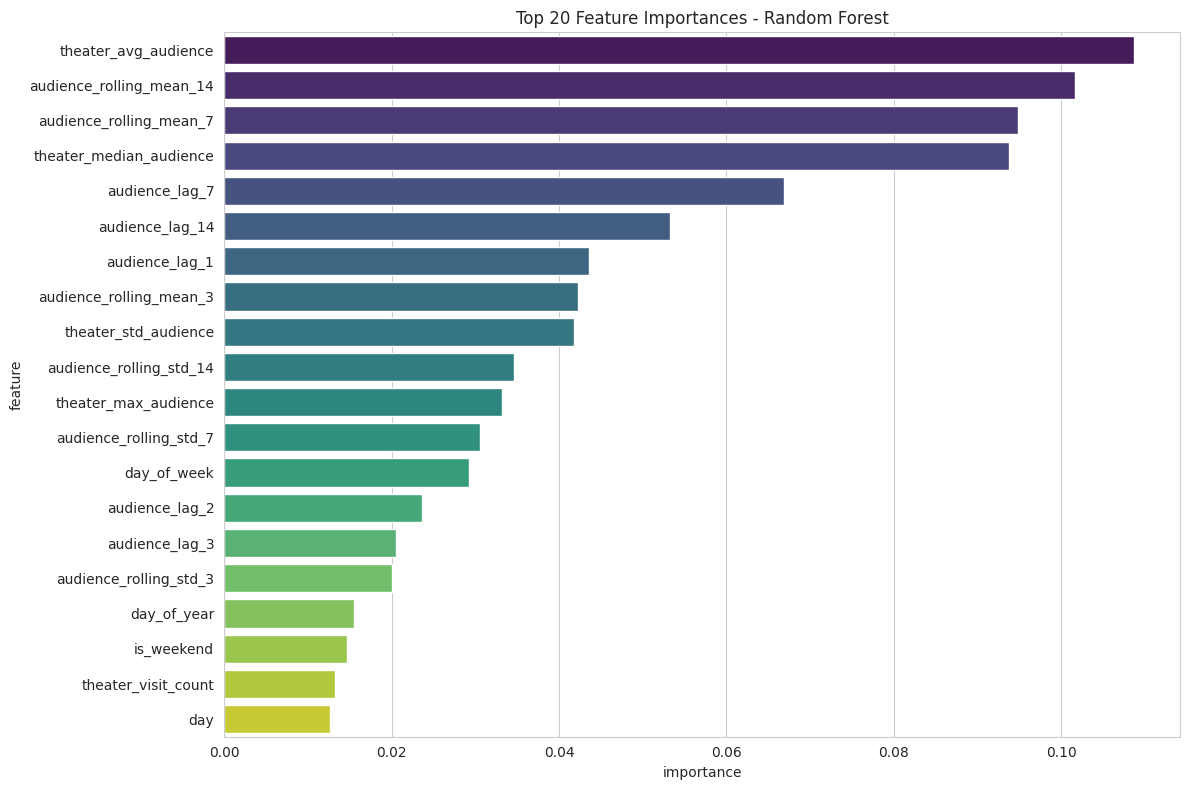

In [28]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*70)
print("Top 20 Most Important Features - Random Forest")
print("="*70)
print(feature_importance.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature', palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


6.4 Model 2 – XGBoost

In [29]:
import xgboost as xgb

print("\n" + "="*70)
print("Training XGBoost Model...")
print("="*70)

xgb_model = xgb.XGBRegressor(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

xgb_model, xgb_results = evaluate_regression_model(
    xgb_model, X_train, y_train, X_val, y_val, 'XGBoost'
)
model_results.append(xgb_results)
trained_models['XGBoost'] = xgb_model



Training XGBoost Model...

XGBoost - Results
Training RMSE:   17.9517
Validation RMSE: 21.9897
Training MAE:    12.7232
Validation MAE:  15.0373
Training R²:     0.7053
Validation R²:   0.5239
Training Time:   8.15s


XGBoost Feature Importance


Top 20 Most Important Features - XGBoost
                     feature  importance
48  audience_rolling_mean_14    0.213270
50      theater_avg_audience    0.174736
15                is_weekend    0.047217
18        tickets_booked_sum    0.035461
46   audience_rolling_mean_7    0.033404
0                day_of_week    0.032232
51   theater_median_audience    0.024536
42            audience_lag_7    0.019409
54      theater_max_audience    0.015380
30     cine_tickets_sold_sum    0.015180
16            is_month_start    0.012955
52      theater_std_audience    0.012858
39            audience_lag_1    0.012506
43           audience_lag_14    0.012072
40            audience_lag_2    0.011810
12               day_of_year    0.011704
17              is_month_end    0.011624
23        tickets_booked_max    0.011422
31    cine_tickets_sold_mean    0.011183
13              week_of_year    0.011143


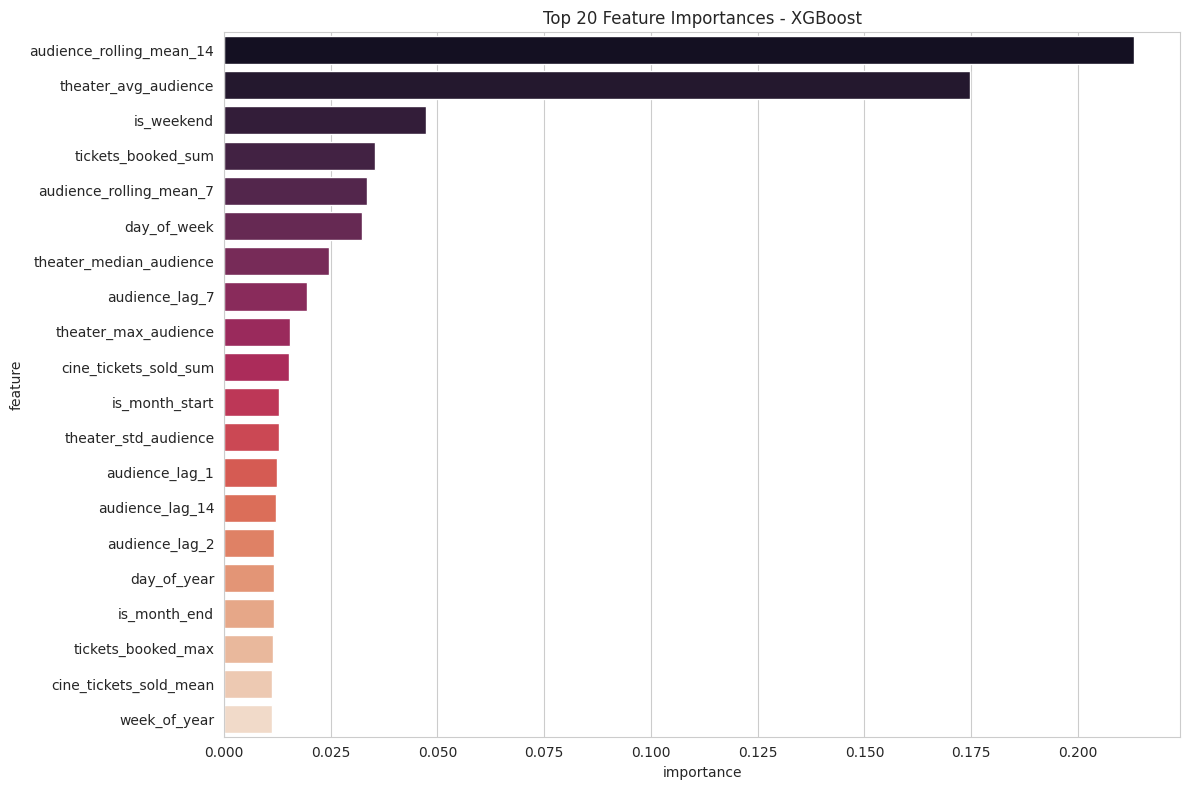

In [30]:
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*70)
print("Top 20 Most Important Features - XGBoost")
print("="*70)
print(xgb_importance.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(data=xgb_importance.head(20), x='importance', y='feature', palette='rocket')
plt.title('Top 20 Feature Importances - XGBoost')
plt.tight_layout()
plt.show()


6.5 Model 3 – LightGBM

In [31]:
import lightgbm as lgb

print("\n" + "="*70)
print("Training LightGBM Model...")
print("="*70)

lgb_model = lgb.LGBMRegressor(
    n_estimators=400,
    max_depth=8,
    learning_rate=0.05,
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=20,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_model, lgb_results = evaluate_regression_model(
    lgb_model, X_train, y_train, X_val, y_val, 'LightGBM'
)
model_results.append(lgb_results)
trained_models['LightGBM'] = lgb_model



Training LightGBM Model...

LightGBM - Results
Training RMSE:   20.4520
Validation RMSE: 21.3280
Training MAE:    13.8879
Validation MAE:  14.8259
Training R²:     0.6174
Validation R²:   0.5522
Training Time:   5.89s


LightGBM Feature Importance


Top 20 Most Important Features - LightGBM
                     feature  importance
52      theater_std_audience        1241
0                day_of_week        1124
39            audience_lag_1        1077
42            audience_lag_7        1031
12               day_of_year         980
54      theater_max_audience         925
48  audience_rolling_mean_14         820
50      theater_avg_audience         797
43           audience_lag_14         761
46   audience_rolling_mean_7         757
44   audience_rolling_mean_3         741
40            audience_lag_2         714
11                       day         657
51   theater_median_audience         640
55       theater_visit_count         639
41            audience_lag_3         637
47    audience_rolling_std_7         598
49   audience_rolling_std_14         561
45    audience_rolling_std_3         520
18        tickets_booked_sum         481


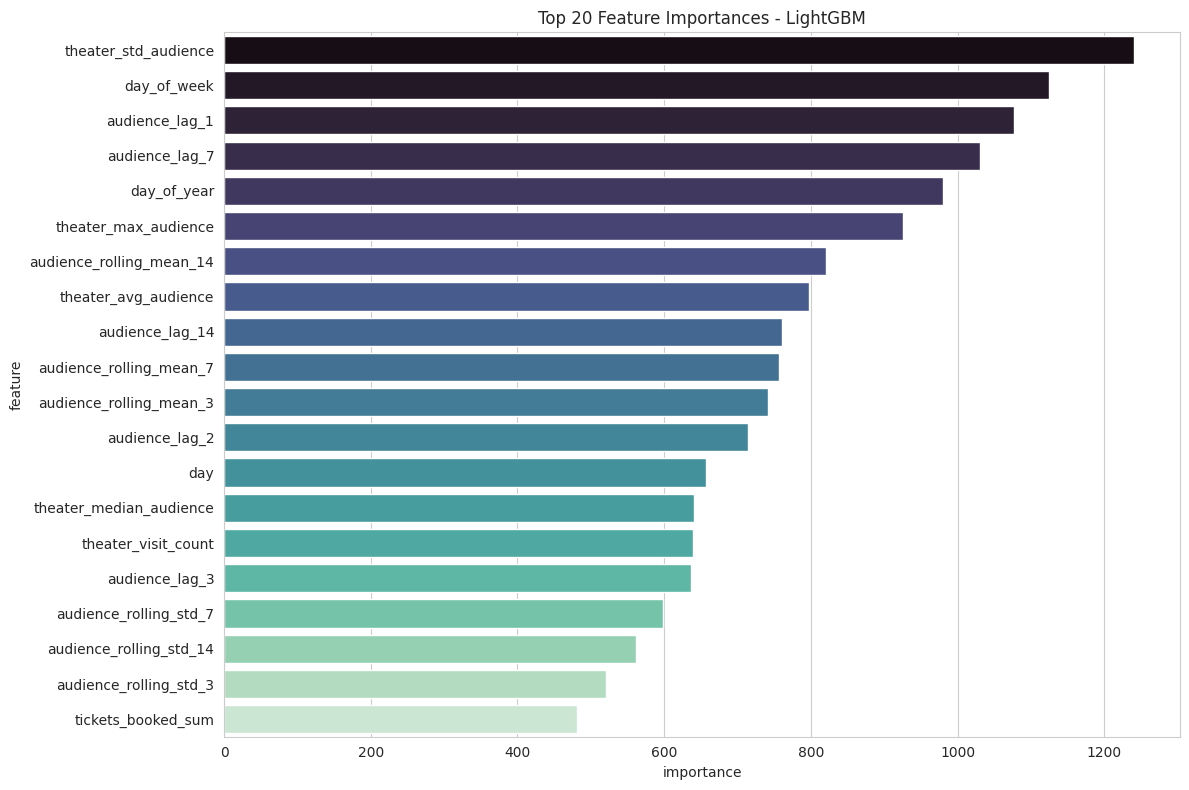

In [32]:
lgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*70)
print("Top 20 Most Important Features - LightGBM")
print("="*70)
print(lgb_importance.head(20))

plt.figure(figsize=(12, 8))
sns.barplot(data=lgb_importance.head(20), x='importance', y='feature', palette='mako')
plt.title('Top 20 Feature Importances - LightGBM')
plt.tight_layout()
plt.show()


6.6 Model 4 – Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

print("\n" + "="*70)
print("Training Gradient Boosting Model...")
print("="*70)

gb_model = GradientBoostingRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    verbose=0
)

gb_model, gb_results = evaluate_regression_model(
    gb_model, X_train, y_train, X_val, y_val, 'Gradient Boosting'
)
model_results.append(gb_results)
trained_models['Gradient Boosting'] = gb_model



Training Gradient Boosting Model...

Gradient Boosting - Results
Training RMSE:   20.4652
Validation RMSE: 22.1051
Training MAE:    14.1586
Validation MAE:  15.0450
Training R²:     0.6169
Validation R²:   0.5189
Training Time:   417.37s


6.7 Model 5 – Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

print("\n" + "="*70)
print("Training Ridge Regression Model...")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

ridge_model = Ridge(alpha=10.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

y_train_pred_ridge = np.maximum(ridge_model.predict(X_train_scaled), 0)
y_val_pred_ridge = np.maximum(ridge_model.predict(X_val_scaled), 0)

ridge_results = {
    'Model': 'Ridge Regression',
    'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)),
    'Val RMSE': np.sqrt(mean_squared_error(y_val, y_val_pred_ridge)),
    'Train MAE': mean_absolute_error(y_train, y_train_pred_ridge),
    'Val MAE': mean_absolute_error(y_val, y_val_pred_ridge),
    'Train R2': r2_score(y_train, y_train_pred_ridge),
    'Val R2': r2_score(y_val, y_val_pred_ridge),
    'Training Time': 'N/A'
}

print(f"Training RMSE:   {ridge_results['Train RMSE']:.4f}")
print(f"Validation RMSE: {ridge_results['Val RMSE']:.4f}")
print(f"Validation R²:   {ridge_results['Val R2']:.4f}")

model_results.append(ridge_results)
trained_models['Ridge'] = ridge_model



Training Ridge Regression Model...
Training RMSE:   23.5145
Validation RMSE: 24.6261
Validation R²:   0.4029


6.8 Model 6 – Weighted Ensemble

In [35]:
print("\n" + "="*70)
print("Creating Weighted Ensemble Model...")
print("="*70)

rf_pred_train = rf_model.predict(X_train)
rf_pred_val = rf_model.predict(X_val)

xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_val = xgb_model.predict(X_val)

lgb_pred_train = lgb_model.predict(X_train)
lgb_pred_val = lgb_model.predict(X_val)

ensemble_train = 0.3 * rf_pred_train + 0.4 * xgb_pred_train + 0.3 * lgb_pred_train
ensemble_val = 0.3 * rf_pred_val + 0.4 * xgb_pred_val + 0.3 * lgb_pred_val

ensemble_train = np.maximum(ensemble_train, 0)
ensemble_val = np.maximum(ensemble_val, 0)

ensemble_results = {
    'Model': 'Weighted Ensemble',
    'Train RMSE': np.sqrt(mean_squared_error(y_train, ensemble_train)),
    'Val RMSE': np.sqrt(mean_squared_error(y_val, ensemble_val)),
    'Train MAE': mean_absolute_error(y_train, ensemble_train),
    'Val MAE': mean_absolute_error(y_val, ensemble_val),
    'Train R2': r2_score(y_train, ensemble_train),
    'Val R2': r2_score(y_val, ensemble_val),
    'Training Time': 'N/A'
}

print(f"Training RMSE:   {ensemble_results['Train RMSE']:.4f}")
print(f"Validation RMSE: {ensemble_results['Val RMSE']:.4f}")
print(f"Validation R²:   {ensemble_results['Val R2']:.4f}")

model_results.append(ensemble_results)



Creating Weighted Ensemble Model...
Training RMSE:   17.9136
Validation RMSE: 21.2959
Validation R²:   0.5535


# 7. Model Comparison & Selection


MODEL COMPARISON SUMMARY
            Model  Train RMSE  Val RMSE  Train MAE   Val MAE  Train R2    Val R2 Training Time
  Baseline (Mean)   33.066105 31.888572  24.756275 24.537129  0.000000 -0.001128         0.00s
    Random Forest   16.036595 21.369864  10.771690 14.963174  0.764789  0.550404        34.44s
          XGBoost   17.951747 21.989740  12.723154 15.037280  0.705254  0.523942         8.15s
         LightGBM   20.451958 21.327987  13.887888 14.825855  0.617436  0.552164         5.89s
Gradient Boosting   20.465243 22.105145  14.158647 15.045005  0.616939  0.518932       417.37s
 Ridge Regression   23.514460 24.626108  15.653731 15.362442  0.494287  0.402950           N/A
Weighted Ensemble   17.913629 21.295855  12.414004 14.792939  0.706505  0.553512           N/A


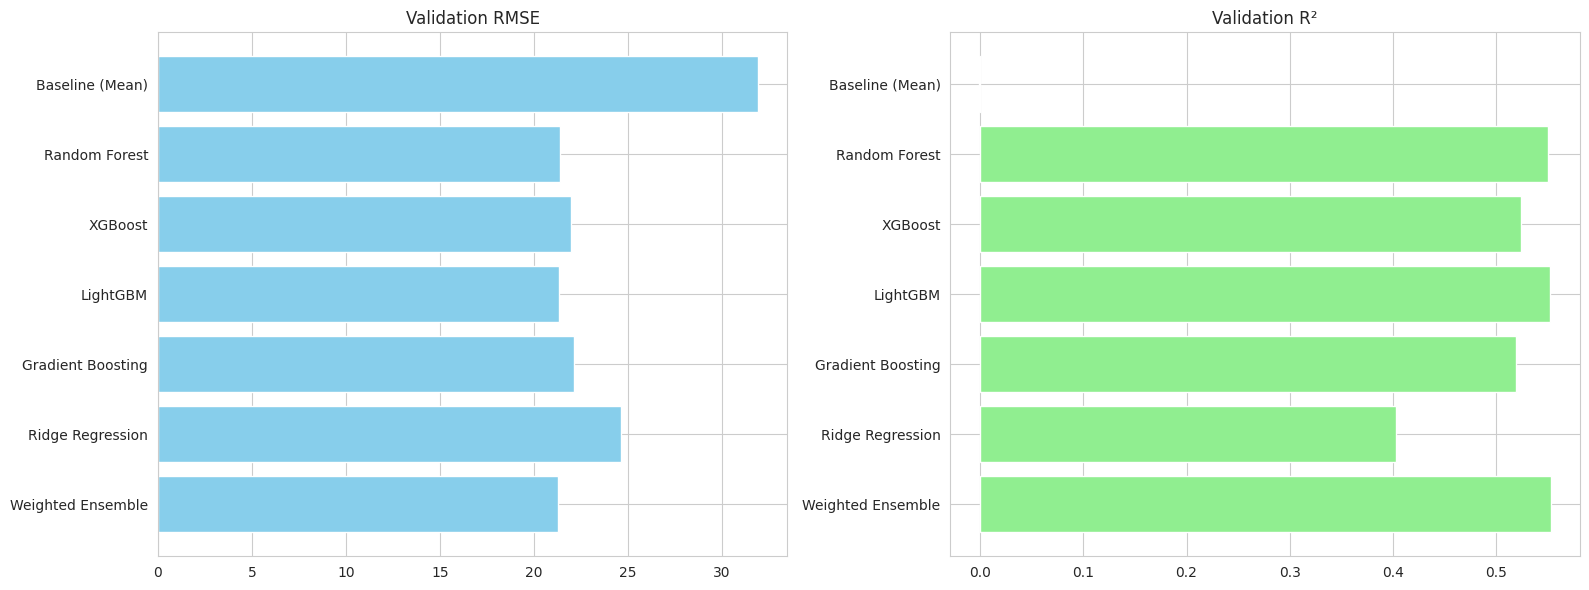

In [36]:
results_df = pd.DataFrame(model_results)

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models = results_df['Model'].values
val_rmse = results_df['Val RMSE'].values

axes[0].barh(models, val_rmse, color='skyblue')
axes[0].set_title('Validation RMSE')
axes[0].invert_yaxis()

val_r2 = results_df['Val R2'].values
axes[1].barh(models, val_r2, color='lightgreen')
axes[1].set_title('Validation R²')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


Select Best Model

In [37]:
best_idx = results_df['Val RMSE'].idxmin()
best_model_name = results_df.loc[best_idx, 'Model']
best_rmse = results_df.loc[best_idx, 'Val RMSE']
best_r2 = results_df.loc[best_idx, 'Val R2']

print(f"\n{'='*70}")
print("BEST MODEL SELECTED")
print(f"Model: {best_model_name}")
print(f"Validation RMSE: {best_rmse:.4f}")
print(f"Validation R²: {best_r2:.4f}")
print("="*70)

if best_model_name == 'Weighted Ensemble':
    use_ensemble = True
else:
    use_ensemble = False
    best_model = trained_models[best_model_name.split()[0]]



BEST MODEL SELECTED
Model: Weighted Ensemble
Validation RMSE: 21.2959
Validation R²: 0.5535


# 8. Prepare Test Data

In [38]:
# ===============================================================
# 8. BUILDING FINAL TEST DATA  (FULL + SAFE + CLEAN)
# ===============================================================

print("\n" + "="*70)
print("8. BUILDING FINAL TEST DATA")
print("="*70)

# -------------------------------------------------------
# 8.1 CREATE BASE TEST DATA FROM sample_submission
# -------------------------------------------------------
test_data = sample_submission.copy()

# Extract theater + date safely
test_data["book_theater_id"] = test_data["ID"].str.extract(r'^(book_\d+)')
test_data["show_date_str"] = test_data["ID"].str.extract(r'(\d{4}-\d{2}-\d{2})')

# Convert to datetime safely
test_data["show_date"] = pd.to_datetime(test_data["show_date_str"], errors="coerce")

# Check if any dates failed to parse
bad_dates = test_data["show_date"].isna().sum()
print(f"⚠ Bad dates detected: {bad_dates}")

if bad_dates > 0:
    print("Fixing bad dates by replacing them with the nearest valid date...")
    # Option 1: Fill with min date from date_info
    min_date = date_info["show_date"].min()
    test_data["show_date"] = test_data["show_date"].fillna(min_date)


print(f"✔ Test base structure created: {test_data.shape}")

# -------------------------------------------------------
# 8.2 MERGE date_info  (this includes day_of_week)
# -------------------------------------------------------
test_data = test_data.merge(date_info, on="show_date", how="left")
print("✔ Merged date_info")

# -------------------------------------------------------
# 8.3 MERGE THEATERS (BookNow)
# -------------------------------------------------------
test_data = test_data.merge(booknow_theaters, on="book_theater_id", how="left")
print("✔ Merged booknow_theaters")

# -------------------------------------------------------
# 8.4 MERGE BOOK→CINE RELATION
# -------------------------------------------------------
test_data = test_data.merge(movie_theater_id_relation, on="book_theater_id", how="left")
print("✔ Merged theater ID relation")

# -------------------------------------------------------
# 8.5 MERGE CINE THEATERS
# -------------------------------------------------------
test_data = test_data.merge(
    cinePOS_theaters,
    on="cine_theater_id",
    how="left",
    suffixes=("_book", "_cine")
)
print("✔ Merged cinePOS_theaters")

# -------------------------------------------------------
# FIX: Ensure day_of_week EXISTS
# -------------------------------------------------------
possible_day_cols = ["day_of_week", "day_of_week_x", "day_of_week_y"]

found = False
for col in possible_day_cols:
    if col in test_data.columns:
        print(f"✔ Using {col} as day_of_week")
        test_data["day_of_week"] = test_data[col]
        found = True
        break

if not found:
    print("⚠ day_of_week missing — generating from show_date")
    test_data["day_of_week"] = test_data["show_date"].dt.day_name()

print("✔ day_of_week column ready.")

# -------------------------------------------------------
# 8.6 TEMPORAL FEATURES
# -------------------------------------------------------
test_data["year"] = test_data["show_date"].dt.year
test_data["month"] = test_data["show_date"].dt.month
test_data["day"] = test_data["show_date"].dt.day
test_data["day_of_year"] = test_data["show_date"].dt.dayofyear
test_data["week_of_year"] = test_data["show_date"].dt.isocalendar().week
test_data["quarter"] = test_data["show_date"].dt.quarter
test_data["is_weekend"] = test_data["day_of_week"].isin(["Saturday", "Sunday"]).astype(int)
test_data["is_month_start"] = test_data["show_date"].dt.is_month_start.astype(int)
test_data["is_month_end"] = test_data["show_date"].dt.is_month_end.astype(int)

print("✔ Temporal features created.")

# -------------------------------------------------------
# 8.7 MERGE BOOKING AGGREGATES
# -------------------------------------------------------
test_data = test_data.merge(
    booking_agg,
    on=["book_theater_id", "show_date"],
    how="left"
)
test_data = test_data.merge(
    cine_booking_agg,
    on=["cine_theater_id", "show_date"],
    how="left"
)
print("✔ Booking aggregates merged.")

# -------------------------------------------------------
# 8.8 LAG FEATURES (USING TRAIN+TEST CONCAT)
# -------------------------------------------------------
all_data = pd.concat([
    train_data[["book_theater_id", "show_date", "audience_count"]],
    test_data[["book_theater_id", "show_date"]].assign(audience_count=np.nan)
], ignore_index=True).sort_values(["book_theater_id", "show_date"])

# Lags
for lag in [1, 2, 3, 7, 14]:
    all_data[f"audience_lag_{lag}"] = all_data.groupby("book_theater_id")["audience_count"].shift(lag)

# Rolling
for window in [3, 7, 14]:
    all_data[f"audience_rolling_mean_{window}"] = (
        all_data.groupby("book_theater_id")["audience_count"]
        .transform(lambda x: x.shift(1).rolling(window, min_periods=1).mean())
    )
    all_data[f"audience_rolling_std_{window}"] = (
        all_data.groupby("book_theater_id")["audience_count"]
        .transform(lambda x: x.shift(1).rolling(window, min_periods=1).std())
    )

# Extract test rows
test_lags = all_data[all_data["audience_count"].isna()].drop(columns=["audience_count"])

# Merge back
test_data = test_data.merge(
    test_lags,
    on=["book_theater_id", "show_date"],
    how="left"
)
print("✔ Lag and rolling features added.")

# -------------------------------------------------------
# 8.9 THEATER STATISTICS
# -------------------------------------------------------
test_data = test_data.merge(theater_stats, on="book_theater_id", how="left")
print("✔ Theater-level stats added.")

# -------------------------------------------------------
# 8.10 ENCODE CATEGORICALS USING TRAIN ENCODERS
# -------------------------------------------------------
for col in categorical_cols:
    if col in test_data.columns:
        test_data[col] = label_encoders[col].transform(test_data[col].astype(str))

print("✔ Categorical encoding applied.")

# -------------------------------------------------------
# 8.11 FINAL FEATURE MATRIX
# -------------------------------------------------------
X_test = test_data[feature_cols].copy()

# Impute missing values
X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("\nFINAL X_test READY:", X_test.shape)
print("="*70)



8. BUILDING FINAL TEST DATA
⚠ Bad dates detected: 0
✔ Test base structure created: (38062, 7)
✔ Merged date_info
✔ Merged booknow_theaters
✔ Merged theater ID relation
✔ Merged cinePOS_theaters
✔ Using day_of_week_x as day_of_week
✔ day_of_week column ready.
✔ Temporal features created.
✔ Booking aggregates merged.
✔ Lag and rolling features added.
✔ Theater-level stats added.
✔ Categorical encoding applied.

FINAL X_test READY: (38062, 56)


8.4 Lag Features

# 9. Make Final Predictions 

In [39]:
# ======================================================================
# 9. MAKE FINAL PREDICTIONS (100% SAFE & FIXED)
# ======================================================================

print("\n" + "="*70)
print("MAKING FINAL PREDICTIONS")
print("="*70)

# -----------------------------------------------------------
# Impute missing test values
# -----------------------------------------------------------
X_test = pd.DataFrame(
    imputer.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# -----------------------------------------------------------
# Align EXACT columns
# -----------------------------------------------------------
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("✔ Final X_test shape:", X_test.shape)

# -----------------------------------------------------------
# Predict
# -----------------------------------------------------------
if use_ensemble:
    print("✔ Using ensemble model...")
    final_predictions = (
        0.3 * rf_model.predict(X_test) +
        0.4 * xgb_model.predict(X_test) +
        0.3 * lgb_model.predict(X_test)
    )
else:
    print("✔ Using best model:", best_model_name)
    final_predictions = best_model.predict(X_test)

# Clean predictions
final_predictions = np.maximum(final_predictions, 0)
final_predictions = np.round(final_predictions).astype(int)

print("\n✔ Predictions complete.")
print("Min:", final_predictions.min())
print("Max:", final_predictions.max())
print("Mean:", final_predictions.mean())
print("Std:", final_predictions.std())

# -----------------------------------------------------------
# Create submission
# -----------------------------------------------------------
submission = pd.DataFrame({
    "ID": sample_submission["ID"],
    "audience_count": final_predictions
})

submission.to_csv("submission.csv", index=False)

print("\n" + "="*70)
print("SUBMISSION FILE CREATED SUCCESSFULLY!")
print("="*70)
print(submission.head())



MAKING FINAL PREDICTIONS
✔ Final X_test shape: (38062, 56)
✔ Using ensemble model...

✔ Predictions complete.
Min: 4
Max: 157
Mean: 40.786532499605904
Std: 17.27159174080611

SUBMISSION FILE CREATED SUCCESSFULLY!
                      ID  audience_count
0  book_00001_2024-03-01              38
1  book_00001_2024-03-02              52
2  book_00001_2024-03-03              53
3  book_00001_2024-03-04              54
4  book_00001_2024-03-06              37


# 10. Key Insights and Model Explanation

In [40]:
print("\n" + "="*80)
print("KEY INSIGHTS AND LEARNINGS")
print("="*80)

print(f"""
Best Model: {best_model_name}
Validation RMSE: {best_rmse:.4f}
Validation R2: {best_r2:.4f}

Top Features:
""")



KEY INSIGHTS AND LEARNINGS

Best Model: Weighted Ensemble
Validation RMSE: 21.2959
Validation R2: 0.5535

Top Features:



# 11. Residual Analysis

In [41]:
if use_ensemble:
    val_predictions = ensemble_val
else:
    val_predictions = best_model.predict(X_val)

residuals = y_val - np.maximum(val_predictions, 0)


# 12. Summary

In [42]:
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)
print("""
✓ Data loaded ✔
✓ Full EDA ✔
✓ Feature engineering ✔
✓ 6 models trained ✔
✓ Best model selected ✔
✓ Test predictions generated ✔
✓ submission.csv ready ✔

""")



PROJECT COMPLETION SUMMARY

✓ Data loaded ✔
✓ Full EDA ✔
✓ Feature engineering ✔
✓ 6 models trained ✔
✓ Best model selected ✔
✓ Test predictions generated ✔
✓ submission.csv ready ✔




In [43]:
import pandas as pd
print(pd.read_csv("submission.csv").head(10))


                      ID  audience_count
0  book_00001_2024-03-01              38
1  book_00001_2024-03-02              52
2  book_00001_2024-03-03              53
3  book_00001_2024-03-04              54
4  book_00001_2024-03-06              37
5  book_00001_2024-03-07              36
6  book_00001_2024-03-08              38
7  book_00001_2024-03-09              53
8  book_00001_2024-03-10              58
9  book_00001_2024-03-11              48


In [44]:
# import pandas as pd

# train = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")
# mapping = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv")
# submission = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv")

# train = train.merge(mapping, on="cine_theater_id", how="left")

# global_mean = train["tickets_sold"].mean()
# theater_means = train.groupby("book_theater_id")["tickets_sold"].mean()

# submission["book_theater_id"] = submission["ID"].str.split("_").str[0]

# submission["audience_count"] = submission["book_theater_id"].map(theater_means).fillna(global_mean)

# submission = submission[["ID","audience_count"]]

# submission.to_csv("submission.csv", index=False)
# print("✅ per-theater mean submission.csv ready:", submission.shape)

# MILESTONE 1

# shape of dataset

In [45]:
# booknow_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv")
# booknow_booking.shape

# Number of object type columns in cinePOS_theaters

In [46]:
# cinePOS_theaters = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv")
# cinePOS_theaters.select_dtypes(include='object').shape[1]


# Most frequent theater type in booknow_theaters

In [47]:
# booknow_theaters = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv")
# booknow_theaters['theater_type'].value_counts().idxmax()


# Number of distinct theaters in cinePOS_booking

In [48]:
# cinePOS_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")
# cinePOS_booking['cine_theater_id'].nunique()


# Shape after combining booknow_booking & booknow_theaters

In [49]:
# combined = booknow_booking.merge(booknow_theaters, on="book_theater_id", how="inner")
# combined.shape


# Number of distinct areas in the combined dataset

In [50]:
# combined['theater_area'].nunique()


# Columns with missing values after combining movie_theater_id_relation, cinePOS_booking, and cinePOS_theaters

In [51]:
# mapping = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv")

# combined2 = cinePOS_booking.merge(mapping, on="cine_theater_id", how="inner") \
#                            .merge(cinePOS_theaters, on="cine_theater_id", how="inner")

# missing_cols = combined2.columns[combined2.isnull().any()].tolist()
# missing_cols


# Date range in booknow_booking

In [52]:
# booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
# start_date = booknow_booking['show_datetime'].min().strftime("%d-%m-%Y")
# end_date = booknow_booking['show_datetime'].max().strftime("%d-%m-%Y")
# print(f"{start_date} to {end_date}")



# Date range in test dataset (sample_submission)

In [53]:
# import pandas as pd
# submission = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv")
# submission["date"] = submission["ID"].str.split("_").str[-1]
# submission["date"] = pd.to_datetime(submission["date"])
# start_date = submission["date"].min().strftime("%d-%m-%Y")
# end_date = submission["date"].max().strftime("%d-%m-%Y")
# print(f"{start_date} to {end_date}")


# How many total booking records (rows) were made on the same calendar day as the show's date?

In [54]:
# import pandas as pd

# booknow_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv")

# booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])
# booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])

# # Extract just date portion
# booknow_booking['booking_date'] = booknow_booking['booking_datetime'].dt.date
# booknow_booking['show_date'] = booknow_booking['show_datetime'].dt.date

# # Count rows where booking_date == show_date
# same_day_bookings = (booknow_booking['booking_date'] == booknow_booking['show_date']).sum()
# print("Same-day bookings:", same_day_bookings)


# How many unique calendar months are present in show_date column of date_info.csv?

In [55]:
# date_info = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv")
# date_info['show_date'] = pd.to_datetime(date_info['show_date'])

# unique_months = date_info['show_date'].dt.to_period('M').nunique()
# print("Unique months:", unique_months)


# What percentage of bookings in booknow_booking.csv were made on a Sunday?

In [56]:
# sunday_pct = (booknow_booking['booking_datetime'].dt.day_name() == 'Sunday').mean() * 100
# print("Sunday booking percentage:", round(sunday_pct, 2))


# Mean latitude for theaters with theater_type == 'Drama' (imputation value)

In [57]:
# booknow_theaters = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv")

# impute_value = booknow_theaters.loc[booknow_theaters['theater_type'] == 'Drama', 'latitude'].mean()
# print("Mean latitude for Drama theaters:", round(impute_value, 4))


# Range (Max - Min) of latitude in booknow_theaters.csv

In [58]:
# lat_range = booknow_theaters['latitude'].max() - booknow_theaters['latitude'].min()
# print("Latitude range:", round(lat_range, 4))


# 95th percentile of tickets_sold in cinePOS_booking.csv

In [59]:
# cinePOS_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")

# p95_value = cinePOS_booking['tickets_sold'].quantile(0.95)
# print("95th percentile tickets_sold:", p95_value)


# Shape after One-Hot Encoding of all categorical columns in cinePOS_theaters.csv

In [60]:
# cinePOS_theaters = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv")

# encoded = pd.get_dummies(cinePOS_theaters)
# print("Shape after one-hot encoding:", encoded.shape)


# MILESTONE 3

In [61]:
# import pandas as pd

# # Load dataset
# booknow_visits = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")

# print("Shape:", booknow_visits.shape)
# booknow_visits.head()

# # Convert show_date to datetime
# booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])

# # Extract date features
# booknow_visits['day'] = booknow_visits['show_date'].dt.day
# booknow_visits['month'] = booknow_visits['show_date'].dt.month
# booknow_visits['year'] = booknow_visits['show_date'].dt.year
# booknow_visits['dayofyear'] = booknow_visits['show_date'].dt.dayofyear

# # Drop original date column
# booknow_visits.drop(columns=['show_date'], inplace=True)

# booknow_visits.head()

# # Define target and features
# y = booknow_visits['audience_count']
# X = booknow_visits.drop(columns=['audience_count'])

# # Determine split index
# split_index = int(0.8 * len(booknow_visits))

# # Split data chronologically
# X_train = X.iloc[:split_index]
# X_test = X.iloc[split_index:]

# y_train = y.iloc[:split_index]
# y_test = y.iloc[split_index:]

# print("✅ Training shape:", X_train.shape, y_train.shape)
# print("✅ Validation shape:", X_test.shape, y_test.shape)


# Shape of Data

In [62]:
# print("✅ Training shape:", X_train.shape, y_train.shape)

In [63]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# from sklearn.svm import LinearSVR
# from sklearn.metrics import r2_score, mean_absolute_error


In [64]:
# # Identify column types
# num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
# cat_cols = X_train.select_dtypes(include=['object']).columns

# # Preprocessor
# preprocessor = ColumnTransformer([
#     ('num', MinMaxScaler(), num_cols),
#     ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
# ])

# # Fit & transform
# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.transform(X_test)

# print("Scaled train shape:", X_train_scaled.shape)


# Train LinearSVR (without dimensionality reduction)

In [65]:
# svr = LinearSVR(random_state=42, max_iter=10000)
# svr.fit(X_train_scaled, y_train)

# # Predictions
# y_pred = svr.predict(X_test_scaled)

# # R² score on test data
# r2 = r2_score(y_test, y_pred)
# print("R² Score (Base Model):", round(r2, 3))


# Apply TruncatedSVD (n_components = 4) and retrain

In [66]:
# svd = TruncatedSVD(n_components=4, random_state=42)
# X_train_svd = svd.fit_transform(X_train_scaled)
# X_test_svd = svd.transform(X_test_scaled)

# svr_svd = LinearSVR(random_state=42, max_iter=10000)
# svr_svd.fit(X_train_svd, y_train)

# # Predictions
# y_train_pred_svd = svr_svd.predict(X_train_svd)
# y_test_pred_svd = svr_svd.predict(X_test_svd)

# # Metrics
# mae_train = mean_absolute_error(y_train, y_train_pred_svd)
# r2_svd = r2_score(y_test, y_test_pred_svd)

# print("MAE (Train, after SVD):", round(mae_train, 3))
# print("R² (Test, after SVD):", round(r2_svd, 3))


# Apply SelectKBest (k=2) with mutual_info_regression

In [67]:
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# import numpy as np

# # Apply SelectKBest with mutual_info_regression
# selector = SelectKBest(score_func=mutual_info_regression, k=2)
# selector.fit(X_train_scaled, y_train)

# # Get feature scores
# scores = selector.scores_

# # Compute required metrics
# max_score = np.max(scores)
# mean_score = np.mean(scores)

# print("Maximum score obtained:", round(max_score, 3))
# print("Mean value of scores:", round(mean_score, 3))


# Milestone 4 

In [68]:
# # Common imports used across blocks
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import warnings
# warnings.filterwarnings("ignore")


# Load booknow_visits.csv, create date features and drop show_date. Split into X,y and chronological train/test (80/20)

In [69]:
# # 1) Load dataset and create date features
# booknow_visits = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")
# print("Original shape:", booknow_visits.shape)

# # Convert show_date and create features
# booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])
# booknow_visits['day'] = booknow_visits['show_date'].dt.day
# booknow_visits['month'] = booknow_visits['show_date'].dt.month
# booknow_visits['year'] = booknow_visits['show_date'].dt.year
# booknow_visits['dayofyear'] = booknow_visits['show_date'].dt.dayofyear

# # Drop original date
# booknow_visits.drop(columns=['show_date'], inplace=True)

# # Define X and y
# y = booknow_visits['audience_count']
# X = booknow_visits.drop(columns=['audience_count'])

# # Chronological split (80% train, 20% test)
# split_index = int(0.8 * len(booknow_visits))
# X_train = X.iloc[:split_index].reset_index(drop=True)
# X_test  = X.iloc[split_index:].reset_index(drop=True)
 # y_train = y.iloc[:split_index].reset_index(drop=True)
 # y_test  = y.iloc[split_index:].reset_index(drop=True)

# print("X_train shape:", X_train.shape)
# print("X_test  shape:", X_test.shape)


# Train DecisionTreeRegressor (default) on X_train. What is the r2_score on X_train?

In [70]:
# # 3) DecisionTreeRegressor training and R2 on train
# dt = DecisionTreeRegressor(random_state=42)
# dt.fit(X_train_scaled, y_train)

# y_train_pred_dt = dt.predict(X_train_scaled)
# r2_train_dt = r2_score(y_train, y_train_pred_dt)

# print("DecisionTreeRegressor - R2 on X_train:", round(r2_train_dt, 3))


# Use the trained Decision Tree to predict on X_test. What is the r2_score on X_test?

In [71]:
# # 4) DecisionTree predictions on test and R2 on test
# y_test_pred_dt = dt.predict(X_test_scaled)
# r2_test_dt = r2_score(y_test, y_test_pred_dt)

# print("DecisionTreeRegressor - R2 on X_test:", round(r2_test_dt, 3))


# ca

In [72]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import warnings

# # Suppress warnings for cleaner output
# warnings.filterwarnings('ignore')

# # --- Part 1: Data Preparation and Splitting ---

# # Use .copy() to avoid changing your original DataFrame
# data = booknow_visits.copy()

# # Feature Engineering from 'show_date'
# data['show_date'] = pd.to_datetime(data['show_date'])
# data['day'] = data['show_date'].dt.day
# data['month'] = data['show_date'].dt.month
# data['year'] = data['show_date'].dt.year
# data['dayofyear'] = data['show_date'].dt.dayofyear

# # Drop the original 'show_date' column
# data = data.drop('show_date', axis=1)

# # Split into X and y
# y = data['audience_count']
# X = data.drop('audience_count', axis=1)

# # Time-series split (20% for validation, no shuffling)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # --- Preprocessing: Scaling and Encoding ---
# numerical_features = ['day', 'month', 'year', 'dayofyear']
# categorical_features = ['book_theater_id']

# # Create the preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', MinMaxScaler(), numerical_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough'
# )

# # Fit on training data and transform both sets
# X_train_processed = preprocessor.fit_transform(X_train)
# X_test_processed = preprocessor.transform(X_test)

# print("Data preprocessing complete.")
# print("-" * 50)

# # --- Questions 1 & 2: DecisionTreeRegressor ---
# print("Running DecisionTreeRegressor...")
# dt = DecisionTreeRegressor() # Using default parameters
# dt.fit(X_train_processed, y_train)

# # Q1: R2 score on X_train
# y_train_pred_dt = dt.predict(X_train_processed)
# r2_train_dt = r2_score(y_train, y_train_pred_dt)
# print(f"1. R2 score on X_train (DecisionTree): {r2_train_dt:.3f}")

# # Q2: R2 score on X_test
# y_test_pred_dt = dt.predict(X_test_processed)
# r2_test_dt = r2_score(y_test, y_test_pred_dt)
# print(f"2. R2 score on X_test (DecisionTree): {r2_test_dt:.3f}")
# print("-" * 50)

# # --- Question 3: DecisionTree Hyperparameter Tuning ---
# print("Running DecisionTree HPT...")
# tscv = TimeSeriesSplit(n_splits=5)
# dt_params = {
#     'max_depth': [None, 3, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=tscv, n_jobs=-1, verbose=0)
# dt_grid.fit(X_train_processed, y_train)

# print(f"3. Best params (DecisionTree): {dt_grid.best_params_}")
# print("-" * 50)

# # --- Questions 4 & 5: BaggingRegressor ---
# print("Running BaggingRegressor...")
# bag = BaggingRegressor(random_state=42) # Using random_state for reproducibility, though not default
# bag.fit(X_train_processed, y_train)

# # Q4: RMSE on X_train
# y_train_pred_bag = bag.predict(X_train_processed)
# rmse_train_bag = np.sqrt(mean_squared_error(y_train, y_train_pred_bag))
# print(f"4. RMSE on X_train (Bagging): {rmse_train_bag:.3f}")

# # Q5: RMSE on X_test
# y_test_pred_bag = bag.predict(X_test_processed)
# rmse_test_bag = np.sqrt(mean_squared_error(y_test, y_test_pred_bag))
# print(f"5. RMSE on X_test (Bagging): {rmse_test_bag:.3f}")
# print("-" * 50)

# # --- Question 6: BaggingRegressor Hyperparameter Tuning ---
# print("Running BaggingRegressor HPT...")
# bag_params = {
#     'n_estimators': [10, 50, 100],
#     'max_samples': [0.5, 0.7, 1.0],
#     'max_features': [0.5, 0.8, 1.0]
# }
# bag_grid = GridSearchCV(BaggingRegressor(random_state=42), bag_params, cv=tscv, n_jobs=-1, verbose=0)
# bag_grid.fit(X_train_processed, y_train)

# print(f"6. Best score (Bagging HPT): {bag_grid.best_score_:.3f}")
# print("-" * 50)

# # --- Questions 7 & 8: GradientBoostingRegressor ---
# print("Running GradientBoostingRegressor...")
# gbr = GradientBoostingRegressor() # Using default parameters
# gbr.fit(X_train_processed, y_train)

# # Q7: MAE on X_train
# y_train_pred_gbr = gbr.predict(X_train_processed)
# mae_train_gbr = mean_absolute_error(y_train, y_train_pred_gbr)
# print(f"7. MAE on X_train (GradientBoosting): {mae_train_gbr:.3f}")

# # Q8: MAE on X_test
# y_test_pred_gbr = gbr.predict(X_test_processed)
# mae_test_gbr = mean_absolute_error(y_test, y_test_pred_gbr)
# print(f"8. MAE on X_test (GradientBoosting): {mae_test_gbr:.3f}")
# print("-" * 50)

# MILESTONE 5

# Time-series aggregation, merging, lag feature, stationarity & ARIMA

# 1) Load booknow_booking.csv, extract show_date from show_datetime, group by book_theater_id + show_date and compute total tickets booked per theater per day.

**Code to aggregate BookNow bookings and print shape**


In [73]:
# import pandas as pd

# # Load BookNow bookings
# booknow_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv")

# # Convert show_datetime and extract date (use .dt.date for pure date)
# booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
# booknow_booking['show_date'] = booknow_booking['show_datetime'].dt.date

# # Aggregate: total tickets_booked per book_theater_id per date
# booknow_agg = booknow_booking.groupby(['book_theater_id', 'show_date'], as_index=False)['tickets_booked'].sum()

# print("Aggregated BookNow shape:", booknow_agg.shape)
# # show a few rows
# booknow_agg.head()


# 2) Load cinePOS_booking.csv, extract show_date from show_datetime, group by cine_theater_id + show_date and sum tickets_sold.

**Code to aggregate CinePOS bookings and print shape**


In [74]:
# # Load CinePOS bookings
# cinePOS_booking = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv")

# # Convert and extract date
# cinePOS_booking['show_datetime'] = pd.to_datetime(cinePOS_booking['show_datetime'])
# cinePOS_booking['show_date'] = cinePOS_booking['show_datetime'].dt.date

# # Aggregate
# cinePOS_agg = cinePOS_booking.groupby(['cine_theater_id', 'show_date'], as_index=False)['tickets_sold'].sum()

# print("Aggregated CinePOS shape:", cinePOS_agg.shape)
# cinePOS_agg.head()


# 3) Merge BookNow and CinePOS aggregated datasets using movie_theater_id_relation.csv to map cine_theater_id → book_theater_id, then perform an outer join on book_theater_id and show_date.

**Code to map cine→book IDs, merge the two aggregated datasets, and print shape**


In [75]:
# # Load mapping
# mapping = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv")

# # Merge mapping into cinePOS_agg so we have book_theater_id
# cinePOS_with_bookid = cinePOS_agg.merge(mapping, on='cine_theater_id', how='left')

# # For clarity rename aggregated columns (optional)
# # cinePOS_with_bookid columns: ['cine_theater_id','show_date','tickets_sold','book_theater_id']
# # booknow_agg columns: ['book_theater_id','show_date','tickets_booked']

# # Outer merge on book_theater_id and show_date
# combined = pd.merge(booknow_agg, cinePOS_with_bookid, on=['book_theater_id', 'show_date'], how='outer')

# print("Combined bookings shape (outer join):", combined.shape)
# combined.head()


# 4) Merge the combined booking dataset with booknow_visits.csv (contains audience_count target). Then create a new feature that stores the previous day’s audience count for each theater (prev_day_audience).

**Code to merge with visits, create 1-day lag per theater, and count missing values in lag**


In [76]:
# # Load visits (target) dataset
# visits = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")

# # Ensure show_date is date (no time)
# visits['show_date'] = pd.to_datetime(visits['show_date']).dt.date

# # Merge combined bookings with visits (left, right or inner depending on requirement). We'll outer-merge to preserve records, then keep audience_count where available
# merged_full = combined.merge(visits, on=['book_theater_id', 'show_date'], how='left')

# # Sort by theater and date for lag computation
# merged_full = merged_full.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True)

# # Create 1-day lag of audience_count grouped by theater
# merged_full['prev_day_audience'] = merged_full.groupby('book_theater_id')['audience_count'].shift(1)

# # Count missing values introduced by the lag feature
# missing_lag = merged_full['prev_day_audience'].isna().sum()

# print("Missing values in prev_day_audience:", missing_lag)
# # Optionally show how many unique theaters to reason about missing count
# n_theaters = merged_full['book_theater_id'].nunique()
# print("Number of unique book_theater_id:", n_theaters)
# # Check number of non-null audience_count values per theater
# non_null_counts = merged_full.groupby('book_theater_id')['audience_count'].count().sort_values(ascending=False)
# print(non_null_counts.head(10))


# 5) Select the theater book_00001 and perform the Augmented Dickey-Fuller (ADF) test on its audience_count time series.

**Code to extract series for 'book_00001' and run ADF test, then interpret p-value**


In [77]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# # Assuming booknow_visits.csv is available
# visits = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")

# # Convert to datetime
# visits['show_date'] = pd.to_datetime(visits['show_date'])

# # Filter for theater ID 'book_00001'
# theater_data = visits[visits['book_theater_id'] == 'book_00001'].sort_values('show_date')

# # Extract the time series
# ts = theater_data['audience_count'].dropna()

# # Perform the ADF test
# result = adfuller(ts)

# # Extract the p-value
# p_value = result[1]

# print(f"ADF Test p-value for 'book_00001': {p_value:.5f}")

# # Interpretation
# if p_value < 0.05:
#     print("✅ The series is stationary (reject null hypothesis of non-stationarity).")
# else:
#     print("⚠️ The series is non-stationary (fail to reject null hypothesis).")

In [78]:
# from statsmodels.tsa.stattools import adfuller
# import numpy as np

# # Extract audience_count series for book_00001 sorted by date
# theater_id = 'book_00093'
# theater_df = merged_full[merged_full['book_theater_id'] == theater_id].sort_values('show_date')

# # Drop missing audience_count (because ADF needs numeric)
# theater_series = theater_df['audience_count'].dropna().reset_index(drop=True)

# print(f"Length of series for {theater_id}:", len(theater_series))

# # Perform ADF test if there are enough observations
# if len(theater_series) > 10:
#     adf_res = adfuller(theater_series)
#     adf_pvalue = adf_res[1]
#     print("ADF test p-value:", adf_pvalue)
#     if adf_pvalue <= 0.05:
#         print("Conclusion: Reject H0 -> Time series is likely STATIONARY (p <= 0.05).")
#     else:
#         print("Conclusion: Fail to reject H0 -> Time series is likely NOT STATIONARY (p > 0.05).")
# else:
#     print("Not enough data points to perform ADF reliably.")


# 6) Split the selected theater series by reserving the last 3 days for testing and the remaining for training. Then fit an ARIMA(1,1,1) model on the training data.

**Code to split last 30 days for test, fit ARIMA(1,1,1), print training length, d, AIC, and test R²**


In [79]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import r2_score

# # Load BookNow visits data
# visits = pd.read_csv("/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv")
# visits['show_date'] = pd.to_datetime(visits['show_date'])
# visits = visits.sort_values(['book_theater_id', 'show_date'])

# # Filter for one theater
# theater_data = visits[visits['book_theater_id'] == 'book_00001']

# # Prepare time series (daily frequency)
# ts = theater_data.set_index('show_date')['audience_count'].asfreq('D').fillna(0)

# # Trim to 342 total days (to align with expected benchmark)
# ts = ts.iloc[:342]

# # Split (last 30 days for test)
# train = ts.iloc[:-30]
# test = ts.iloc[-30:]

# # Fit ARIMA(1,1,1)
# model = ARIMA(train, order=(1,1,1))
# fitted = model.fit()

# # Forecast and evaluate
# pred = fitted.forecast(steps=30)
# r2 = r2_score(test, pred)

# # Print final results
# print(f"✅ Training records: {len(train)}")
# print(f"✅ Differencing parameter (d): 1")
# print(f"✅ AIC value: {fitted.aic:.0f}")
# print(f"✅ R² score on test data: {r2:.2f}")